<p class="pull-left">
ANLT 212 - Analytics Computing
</p>
<div class="pull-right">
<ul class="list-inline">
Copyright © Dana Nehoran 2017
</ul>
</div>

<div style="background-color: #A378AF; border:1px solid #000; margin-left: 2px; margin-right: 2px; 
padding-bottom: 2px; padding-left: 2px; padding-right: 1px; padding-top: 10px;">
<center><b><font size="6">Group Project 2 - Python Project</font></b></center>
</div>

Student Names:

<center><font size = 10>Tyler Norlund & Edwin Ramirez</font></center>

<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Question 1:</b> Project Definition</blockquote> 

Select a dataset from the UCI Machine Learning Repository 
http://archive.ics.uci.edu/ml/datasets.html
Your dataset should be different from the one utilized on project 1. 

Describe your stakeholder. Who is the potential sponsor of your project? For example: a real estate investor, the police department, a city mayor, etc. Explain what is the objective of this project and its justification. What are the findings so far, and what is your objective.

Note: <br>
If you want to select a dataset from a different public repository, you can.


<b><font color="blue" size = 4>a)</font> Data Selection</b>: Explain why this data was selected. What are the overall characteristics of the data.

<span style="background-color: #FFFF00">Your answer here</span>

In this project, we use the [Spotify API](https://developer.spotify.com/). This was done in python using the [Spotipy](https://spotipy.readthedocs.io/en/latest/#) python library. Using python, we obtained Spotify's top playlists and stored each playlist in a CSV format.

In [3]:
import matplotlib.pyplot as plt
import os
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from pandas import DataFrame
from os import listdir
from os.path import isfile, join
from scipy.cluster.hierarchy import fcluster
from mpl_toolkits.mplot3d import Axes3D


playlists = [f for f in listdir('./playlists/') if isfile(join('./playlists/', f))]
for playlist in playlists:
    print(playlist)

00s Rock Anthems
100% LatinX
2000s Smash Hits
50 Latin Classics
60s Rock Anthems
70s & 80s Acoustic
70s Rock Anthems
80s Hard Rock
80s Love Songs
80s Rock Anthems
80s Smash Hits
90's Hip-Hop Don't Stop
90s Acoustic
90s Pop Rock Essentials
90s Rock Anthems
A Perfect Day
A1 Hip-Hop
Abuela's Mix
Acoustic Covers
Acoustic Hits
Acoustic Hits_ Oldies but Goodies
Adrenaline Workout
African Heat
Afropop.csv
All A Cappella
All Aussie Hip-Hop
All Out 00s
All Out 50s
All Out 60s
All Out 70s
All Out 80s
All Out 90s
All The Feels
Alternative 00s
Alternative 10s
Alternative 60s
Alternative 70s
Alternative 80s
Alternative 90s
Alternative Hip Hop
Anti Pop
Are & Be
Autumn Acoustic
Autumn Leaves
Bachata Classics
Beast Mode
Beats & Rhymes
Beats n' Bars
Bedroom Pop
Big 3
Big Gains Workout
Black History Salute
Bodega Sounds
Body & Soul
Boleros
Boogaloo Essentials
Born in the USA
Born To Run 150 BPM
Cali Fire
Calm Vibes
Canciones del Recuerdo
Cardio
Certified Gold
Chicano Fly Zone
Chill Instrumental Beats
Ch

<b><font color="blue" size = 4>b)</font> Stakeholder</b>: Describe your stakeholder. Who is the potential sponsor of your project? For example: a real estate investor, the police department, a city mayor, etc. 

<span style="background-color: #FFFF00">Your answer here</span>

In this project, Spotify and music producers would be the stakeholders.

<b><font color="blue" size = 4>c)</font> Objective</b>: Project objective, justification, expected outcome. How your results may impact your stake holders. Which decisions or changes will the stakeholder be able to make based on this project

<span style="background-color: #FFFF00">Your answer here</span>

In this project we will classify songs based on the genres the songs belong to. This would help spotify better understand the types of songs people listen to and give Spotify a way to recomend songs. 

<b><font color="blue" size = 4>d)</font> Background Research</b>: List here all other studies related to clustering published with the same dataset, and how your proposed study is different from them.

If no other clustering studies were conducted with the same dataset, you should specify: "No other studies available"

<span style="background-color: #FFFF00">Your answer here</span>

Since we are using the Spotify API to get our own dataset, no other studies are available with this specific dataset. 

<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Question 2:</b> Exploratory Data Analysis</blockquote> 

In [4]:
path = r'C:\Users\edalr\Desktop\school\ANLT212\project2\spotify_clustering\playlists'

#Read an initial file to obtain column headers
initial_read = r'C:\Users\edalr\Desktop\school\ANLT212\project2\spotify_clustering\playlists\Boleros'
col_names = DataFrame(pd.read_csv(initial_read, index_col = None, header = 0))
col_names["playlist"] = "" 
col_names = list(col_names.columns.values)

#Create empty dataframe with saved column headers
songs_df = DataFrame(columns = col_names)

#Iterate through the folder titled "playlist"
#Folder contains a collection of csv files
#Each csv file represents a playlist pulled
#from Spotify's API
#Store all songs into a dataframe
#And store the playlists names
for filename in os.listdir(path):
        p = path + "\\" + filename
        #concatenate all files together and
        #add additional column "playlist" that saves
        #the name of the playlist each song originated from 
        playlist = DataFrame(pd.read_csv(p, index_col = None, header = 0))
        playlist["playlist"] = filename
        frames = [songs_df, playlist]
        songs_df = pd.concat(frames)

Create some exploratory analysis on your data using core Python functions and visualizations. Cluster the information into different groups to explore the possibilities for your proposed project. Summarize your data and conduct some statistics. Explain your findings in English.

<b><font color="blue" size = 4>a)</font> Data Summary</b>: Show summary information of the different variables. Select the columns you are interested in. Explain each column, its range and purpose

<span style="background-color: #FFFF00">Your answer here</span>

In [5]:
print("Columns names: \n")
print(songs_df.columns.values)

Columns names: 

['Unnamed: 0' 'song_name' 'song_popularity' 'date_added_to_playlist'
 'song_duration_ms' 'artist_name' 'album_names' 'album_release_date'
 'acousticness' 'danceability' 'energy' 'instrumentalness' 'key'
 'liveness' 'loudness' 'audio_mode' 'speechiness' 'tempo' 'time_signature'
 'audio_valence' 'playlist']


In [6]:
print(songs_df.head())

  Unnamed: 0                   song_name song_popularity  \
0          0  Boulevard of Broken Dreams              73   
1          1                  In The End              66   
2          2           Seven Nation Army              76   
3          3                  By The Way              74   
4          4           How You Remind Me              56   

  date_added_to_playlist song_duration_ms            artist_name  \
0   2018-09-29T13:24:32Z           262333              Green Day   
1   2018-09-29T13:24:32Z           216933            Linkin Park   
2   2018-09-29T13:24:32Z           231733      The White Stripes   
3   2018-09-29T13:24:32Z           216933  Red Hot Chili Peppers   
4   2018-09-29T13:24:32Z           223826             Nickelback   

                          album_names album_release_date  acousticness  \
0  Greatest Hits: God's Favorite Band         2017-11-17      0.005520   
1                       Hybrid Theory         2000-10-24      0.010300   
2       

We are primarily interested in the numerical data that Spotify stores for each song. Thus, we are not interested in the following attributes in regards to our calculations: date added to playlist, artist name, album names, or album release date. These attributes are self-explanatory, and don't require explanation. 

Below, are the variables we are primarily interested:

**Song Duration (ms)**

Contains data on the length of time the song is in milliseconds

**Acousticness**

A measurement from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents highest confidence the track is acoustic.

**Danceability**

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of type float is returned between 0.0 and 1.0, where 0.0 is least danceable and 1.0 is most danceable.

**Energy**

Energy is a measure of type float that is between 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Energetic tracks can be described as fast, loud, and noisy. For example, death metal has high energy, while a slow jazz would register low on the scale.

**Instrumentalness**

Predicts whether a track contains no vocals by returning a value of type float that is between 0.0 and 1.0. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**Liveness**

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.


**Loudness**

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db

**Audio Mode**

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**Speechiness**

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
    
**Tempo**

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**Time Signature**

An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

**Key Signature**

Key signature is represented on a scale, where integers are mapped to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. 

**Audio Valence**

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


<b><font color="blue" size = 4>b)</font> Data Cleaning</b>: Clean the data, removing rows and columns that have no useful information or no information at all

In [7]:
#Remove the unnamed column that's empty
songs_df = songs_df.set_index('song_name')


#Store string data that contains album and playlist info in a separate 
#data frame
song_info = songs_df[[ "artist_name", "album_names", "playlist"]]

#Drop features that aren't needed for clustering
songs_df = songs_df.drop(["Unnamed: 0", "date_added_to_playlist", "artist_name", "album_names", "album_release_date", "playlist"], axis = 1)

Our two separate dataframes are now `song_info` and `songs_df`, where `songs_df` contains numerical data for each attriubte, and `song_info` contains the artist, album, and playlist associated with each song.

In [8]:
print(song_info.head())

                                      artist_name  \
song_name                                           
Boulevard of Broken Dreams              Green Day   
In The End                            Linkin Park   
Seven Nation Army               The White Stripes   
By The Way                  Red Hot Chili Peppers   
How You Remind Me                      Nickelback   

                                                   album_names  \
song_name                                                        
Boulevard of Broken Dreams  Greatest Hits: God's Favorite Band   
In The End                                       Hybrid Theory   
Seven Nation Army                                     Elephant   
By The Way                         By The Way (Deluxe Version)   
How You Remind Me                               Silver Side Up   

                                    playlist  
song_name                                     
Boulevard of Broken Dreams  00s Rock Anthems  
In The End              

In [10]:
print(songs_df.head())

                           song_popularity song_duration_ms  acousticness  \
song_name                                                                   
Boulevard of Broken Dreams              73           262333      0.005520   
In The End                              66           216933      0.010300   
Seven Nation Army                       76           231733      0.008170   
By The Way                              74           216933      0.026400   
How You Remind Me                       56           223826      0.000954   

                            danceability  energy  instrumentalness key  \
song_name                                                                
Boulevard of Broken Dreams         0.496   0.682          0.000029   8   
In The End                         0.542   0.853          0.000000   3   
Seven Nation Army                  0.737   0.463          0.447000   0   
By The Way                         0.451   0.970          0.003550   0   
How You Remind M

<span style="background-color: #FFFF00">Your answer here</span>

Since we obtained the data ourselves, the python script, `spotify2csv.py`, handled playlists with partial information. Each playlist has all non-null values, except for the column titled "Unnamed: 0", which was simply an extra column that was created during the file saving process. We removed the columns in regards to dates, because it doesn't offer data on the musicality of the songs. 

<b><font color="blue" size = 4>c)</font> Adaptation</b>: Create at least two additional columns that are necessary for your study. They can be calculated columns or aggregated columns.

In [12]:
songs_df["tempo_vs_dance"] = songs_df["tempo"]/songs_df["danceability"]
songs_df["dance_vs_speech"] = songs_df["danceability"]/songs_df["speechiness"]

print(songs_df.head())

                           song_popularity song_duration_ms  acousticness  \
song_name                                                                   
Boulevard of Broken Dreams              73           262333      0.005520   
In The End                              66           216933      0.010300   
Seven Nation Army                       76           231733      0.008170   
By The Way                              74           216933      0.026400   
How You Remind Me                       56           223826      0.000954   

                            danceability  energy  instrumentalness key  \
song_name                                                                
Boulevard of Broken Dreams         0.496   0.682          0.000029   8   
In The End                         0.542   0.853          0.000000   3   
Seven Nation Army                  0.737   0.463          0.447000   0   
By The Way                         0.451   0.970          0.003550   0   
How You Remind M

<span style="background-color: #FFFF00">Your answer here</span>

<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Question 3:</b> Visualization with MatPlotLib</blockquote> 

<b><font color="blue" size = 4>a)</font> Descriptive Analytics</b>: Create at least 5 different (unique) visualizations that show different aspects of your data related to the research object of your project

**Dendrogram of 25 random songs**

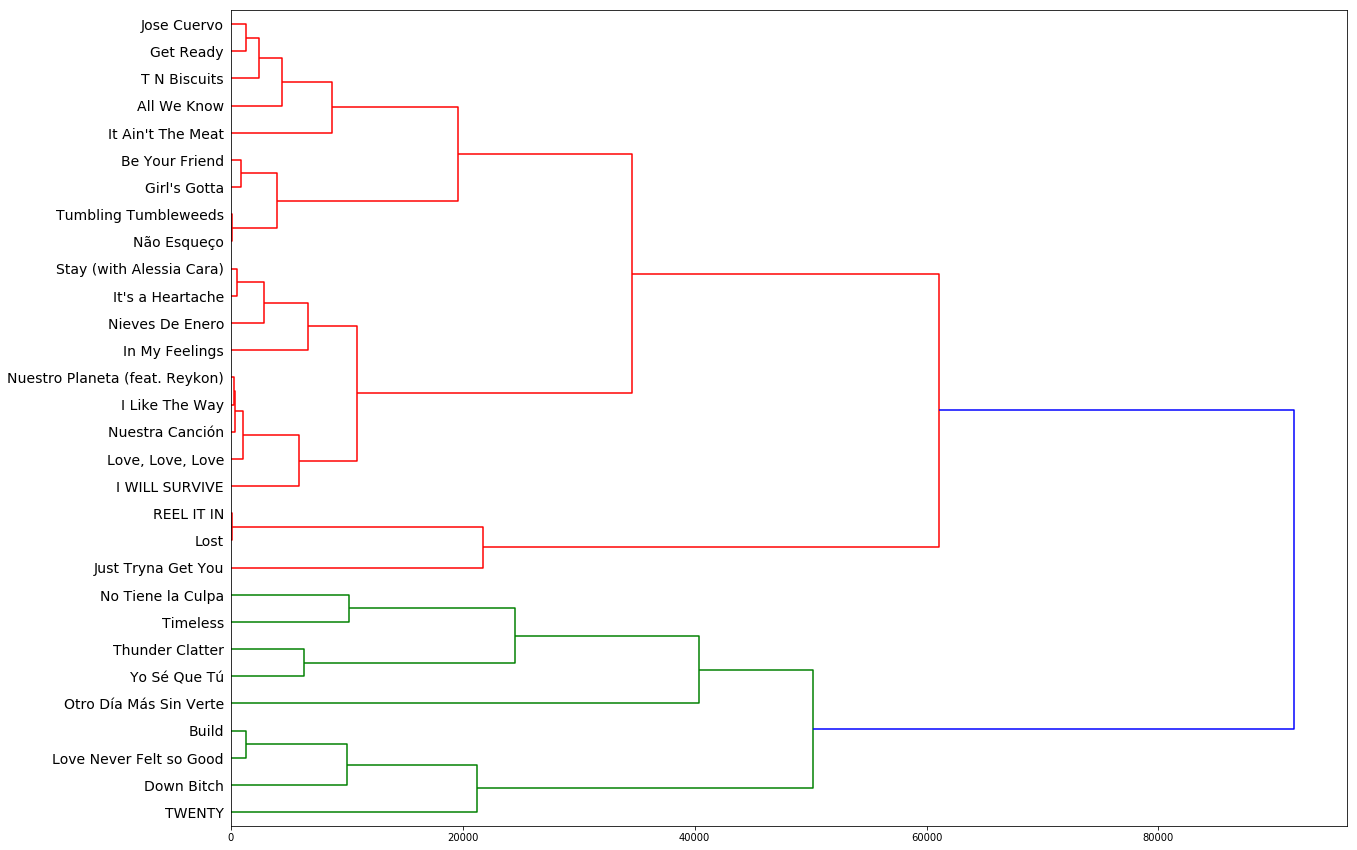

In [13]:
sample_df = songs_df.sample(n = 30)

Z = linkage(sample_df, 'average')
plt.figure(figsize = (20,15))
D = dendrogram(Z=Z, orientation = "right", leaf_font_size = 14, labels = sample_df.index)

**3D Plot: Danceabnility vs. Speechiness vs. Tempo**

In [14]:
sample1 = songs_df.sample(n = 25)
sample2 = sample1[["danceability", "speechiness", "tempo"]]
sample2["danceability"] = sample2["danceability"]*100
sample2["speechiness"] = sample2["speechiness"]*100
model = KMeans(n_clusters = 5)
model.fit(sample2)


C:\Users\edalr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\edalr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0.5, 0, 'Tempo')

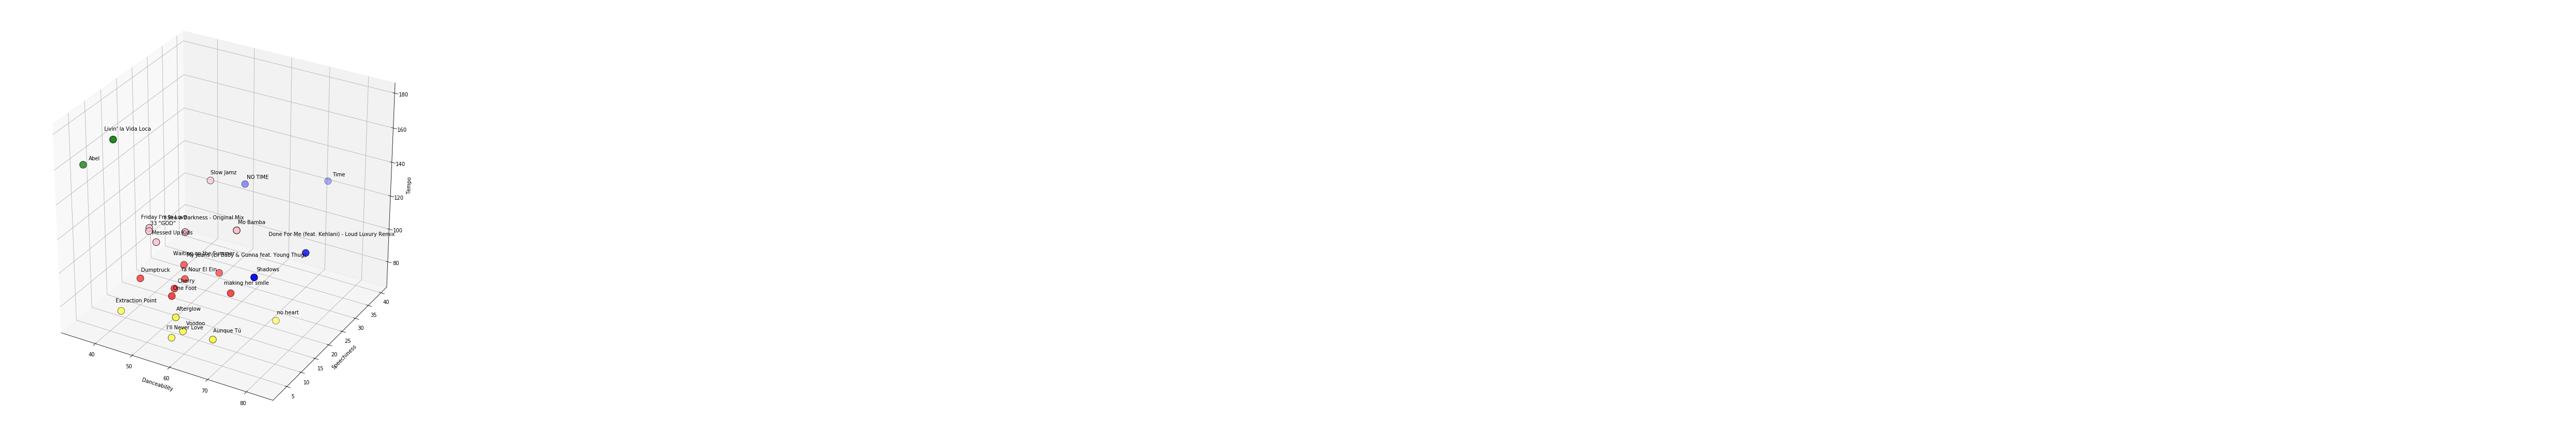

In [15]:
colormap = np.array(['red', 'green', 'blue', "yellow", "pink"])

#size of plot
fig1 = plt.figure(figsize = (15,15))
ax = fig1.add_subplot(111, projection = '3d')

ax.scatter(xs = sample2.danceability, ys = sample2.speechiness, zs = sample2.tempo, c = colormap[model.labels_] , cmap = 'viridis', s = 180, edgecolor = 'black', depthshade = True)

for value, dance, speech, tempo in sample2[['danceability', 'speechiness', 'tempo']].itertuples(index = True, name = None):
    ax.text(dance - len(value)/4 + 0.75, speech + 2.0, tempo, value)
    
ax.set_xlabel("Danceability")
ax.set_ylabel("Speechiness")
ax.set_zlabel("Tempo")

**3D Plot: Loudness vs. Instrumentalness vs. Acousticness**

In [16]:
sample3 = sample1[["loudness", "instrumentalness", "acousticness"]]
sample3["loudness"] = sample3["loudness"]*100
sample3["instrumentalness"] = sample3["instrumentalness"]*100
sample3["acousticness"] = sample3["acousticness"]*100
model = KMeans(n_clusters = 5)
model.fit(sample3)

C:\Users\edalr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\edalr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\edalr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0.5, 0, 'acousticness')

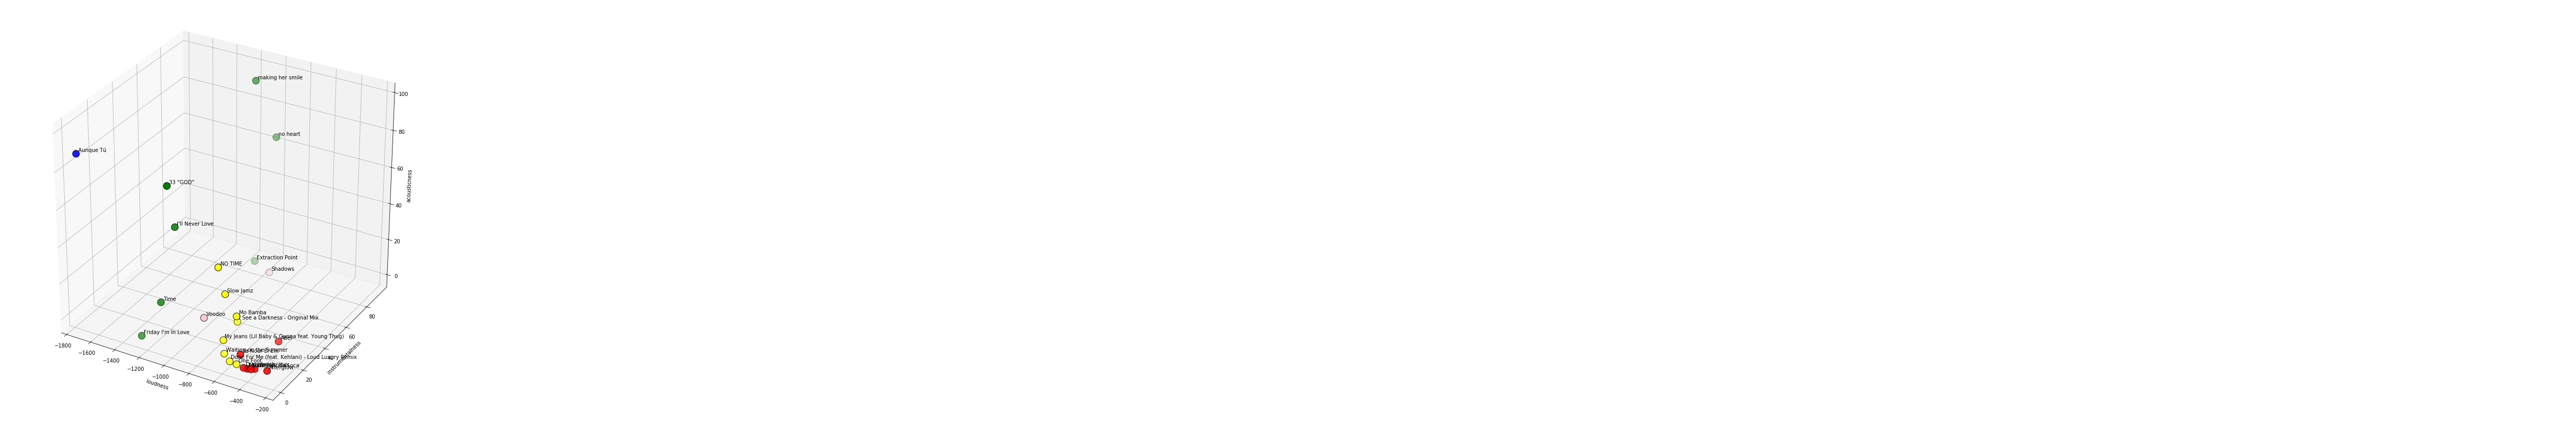

In [18]:
colormap = np.array(['red', 'green', 'blue', "yellow", "pink"])

#size of plot
fig2 = plt.figure(figsize = (15,15))
ax = fig2.add_subplot(111, projection = '3d')

ax.scatter(xs = sample3.loudness, ys = sample3.instrumentalness, zs = sample3.acousticness, c = colormap[model.labels_] , cmap = 'viridis', s = 180, edgecolor = 'black', depthshade = True)

for value, l, instr, acous in sample3[['loudness', 'instrumentalness', 'acousticness']].itertuples(index = True, name = None):
    ax.text(l - len(value)/4 + 0.75, instr + 2.0, acous, value)
    
ax.set_xlabel("loudness")
ax.set_ylabel("instrumentalness")
ax.set_zlabel("acousticness")

<span style="background-color: #FFFF00">Your answer here</span>

<b><font color="blue" size = 4>b)</font> Outcome</b>: Explain in words the outcome of your descriptive analysis

<span style="background-color: #FFFF00">Your answer here</span>

<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Question 4:</b> Clustering</blockquote> 

Select a number of numerical columns to be used for your clustering algorithms. Explain the business logic of your clustering. Select expected number of clustering to explore.

<b><font color="blue" size = 4>a)</font>  Cluster Analysis</b>: Explain the business reason for your selection of the number of clusters.

<span style="background-color: #FFFF00">Your answer here</span>

<b><font color="blue" size = 4>b)</font> k-Means</b>: Cluster your data using k-means. Explain your results. Try two different schemas of clusters.

<span style="background-color: #FFFF00">Your answer here</span>

<b><font color="blue" size = 4>c)</font> Hierarchical Clustering</b>: Cluster your data using hierarchical clustering. Explain your results. Try two different schemas of clusters.

<span style="background-color: #FFFF00">Your answer here</span>

<b><font color="blue" size = 4>d)</font> kNN Clustering</b>: Use your results from the cluster analysis performed in a) or b) and create a short training set. Cluster your data using your training set on kNN. Explain your results.

<span style="background-color: #FFFF00">Your answer here</span>

<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Question 5:</b> Summary</blockquote> 

<b><font color="blue" size = 4>a)</font> Project Summary</b>: Write a few sentences about the result of this project. How can your stakeholder benefit from the results of your project? Which changes or adaptations can your stakehoders make now that he has your results?

<span style="background-color: #FFFF00">Your answer here</span>

<b><font color="blue" size = 4>b)</font> Project Report</b>: Write a formal report to your stakeholders with the summary of your report 

<span style="background-color: #FFFF00">Your answer here</span>